In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Faste parameterverdier brukt i oppgaven
GAMMA = 0.1      # recovery-rate γ
N = 1000         # befolkningsstørrelse
I0 = 1           # initialt antall smittede



def sir_dynamics(t, y, beta, gamma, phi, T_v):
    """Right-hand side for SIR-modellen med vaksinasjon.

    Parameters
    ----------
    t : float
        Tid (dager).
    y : array-like
        [S, I, R] ved tid t.
    beta : float
        Smitte-rate β.
    gamma : float
        Recovery-rate γ.
    phi : float
        Vaksinasjonsrate φ (andel av S vaksinert per dag).
    T_v : float
        Starttidspunkt for vaksinasjon.
    """
    S, I, R = y
    N = S + I + R

    # Heaviside-funksjon: 0 før T_v, 1 etterpå
    H = 1.0 if t >= T_v else 0.0

    dS_dt = -beta * I * S / N - phi * S * H
    dI_dt =  beta * I * S / N - gamma * I
    dR_dt =  gamma * I + phi * S * H

    return [dS_dt, dI_dt, dR_dt]


In [2]:
def sir_model(t_max, N, I_0, beta, gamma, phi=0.0, T_v=0.0, dt=1.0):
    """Løs SIR-modellen med eksplisitt Euler.

    Parametre
    ---------
    t_max : float
        Siste tidspunkt (i dager).
    dt : float
        Tidssteg (i dager). Bruk f.eks. 1.0 eller 0.1.

    Returnerer
    ---------
    t : 1D numpy-array
        Tidspunkter.
    y : 2D numpy-array, shape (len(t), 3)
        Kolonner [S, I, R].
    """
    R0 = 0.0
    S0 = N - I_0
    y0 = np.array([S0, I_0, R0], dtype=float)

    n_steps = int(t_max / dt)
    t = np.linspace(0, n_steps * dt, n_steps + 1)

    y = np.zeros((n_steps + 1, 3), dtype=float)
    y[0] = y0

    for k in range(n_steps):
        S, I, R = y[k]
        dS_dt, dI_dt, dR_dt = sir_dynamics(t[k], (S, I, R), beta, gamma, phi, T_v)

        # Euler-steg
        S_next = S + dt * dS_dt
        I_next = I + dt * dI_dt
        R_next = R + dt * dR_dt

        y[k + 1] = [S_next, I_next, R_next]

    return t, y


In [3]:
def sir_model_and_plot(t_max, N, I_0, beta, gamma, phi=0.0, T_v=0.0, dt=1.0):
    t, y = sir_model(t_max, N, I_0, beta, gamma, phi, T_v, dt)
    S, I, R = y[:, 0], y[:, 1], y[:, 2]

    plt.figure(figsize=(8, 4))
    plt.plot(t, S, label="S(t) - Susceptible")
    plt.plot(t, I, label="I(t) - Infectious")
    plt.plot(t, R, label="R(t) - Removed")

    plt.xlabel("Tid t [dager]")
    plt.ylabel("Antall personer")
    plt.title(f"SIR-modell, β={beta:.3f}, φ={phi:.3f}, T_v={T_v}, dt={dt}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return t, y



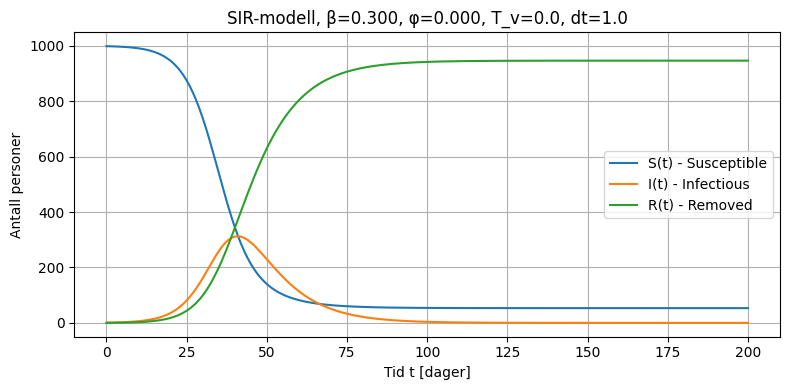

In [4]:
t_max = 200
beta = 0.3

t, y = sir_model_and_plot(
    t_max=t_max,
    N=N,
    I_0=I0,
    beta=beta,
    gamma=GAMMA,
    phi=0.0,
    T_v=0.0,
    dt=1.0   # eller f.eks. 0.1 for glattere kurver
)



β = 0.3, φ = 0.005, T_v = 10


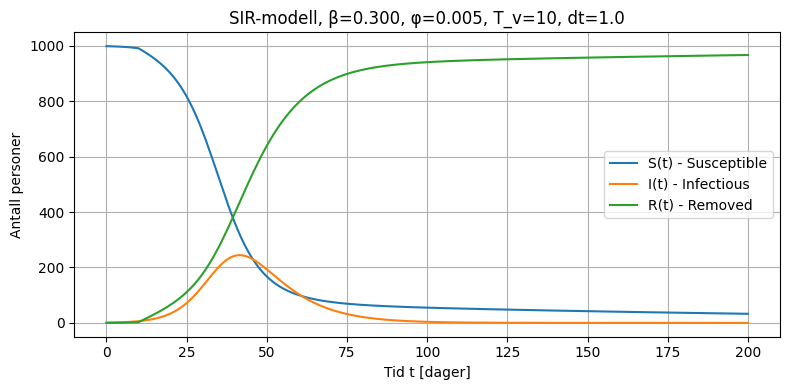

I_max = 244.3

β = 0.3, φ = 0.01, T_v = 10


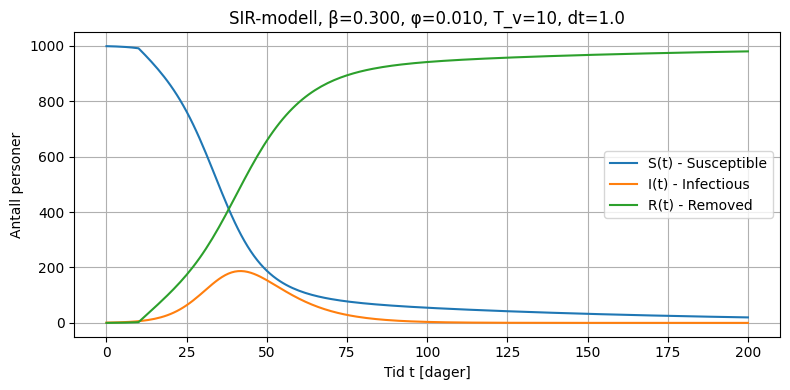

I_max = 187.1

β = 0.3, φ = 0.02, T_v = 10


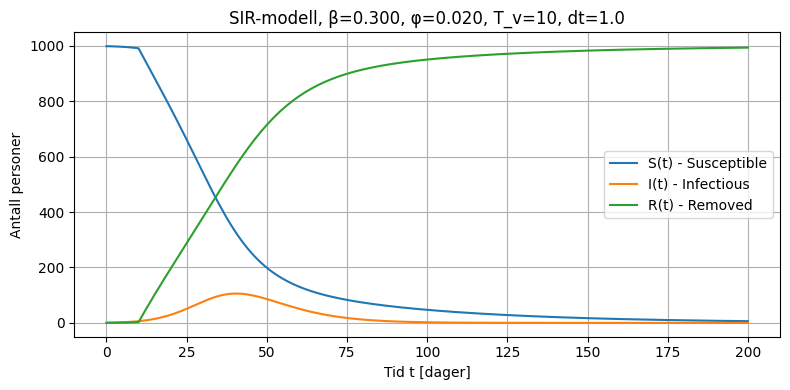

I_max = 105.7


In [5]:
beta = 0.3
T_v = 10
phis = [0.005, 0.01, 0.02]
t_max = 200

for phi in phis:
    print(f"\nβ = {beta}, φ = {phi}, T_v = {T_v}")
    t, y = sir_model_and_plot(
        t_max=t_max,
        N=N,
        I_0=I0,
        beta=beta,
        gamma=GAMMA,
        phi=phi,
        T_v=T_v
    )
    I = y[:, 1]
    print(f"I_max = {I.max():.1f}")



β = 0.3, φ = 0.01, T_v = 0


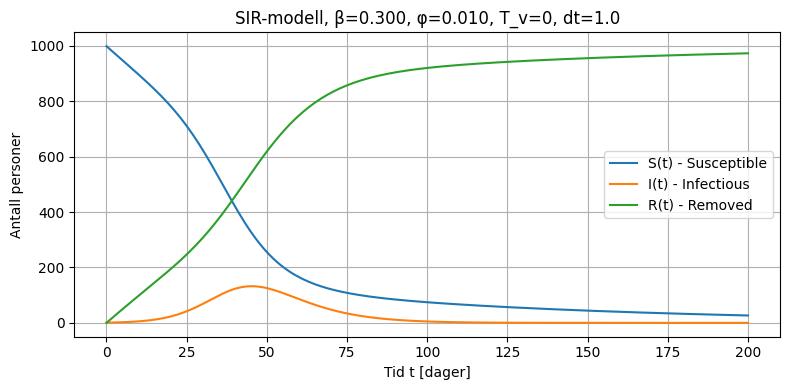

I_max = 132.4

β = 0.3, φ = 0.01, T_v = 10


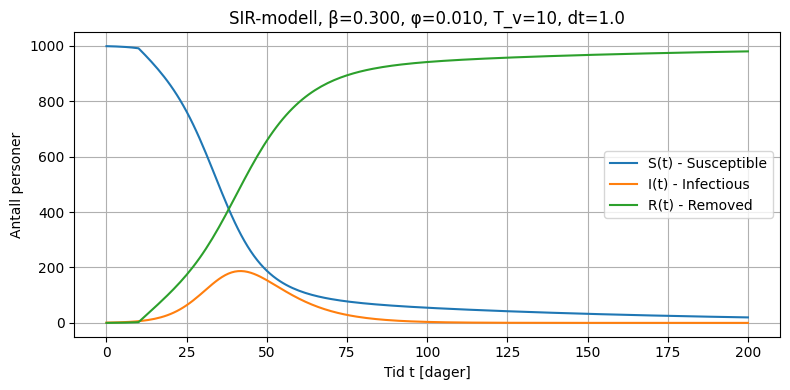

I_max = 187.1

β = 0.3, φ = 0.01, T_v = 20


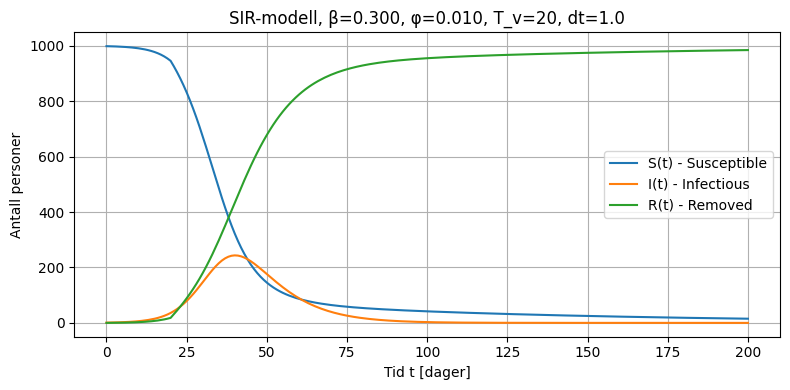

I_max = 243.7


In [6]:
beta = 0.3
phi = 0.01
T_vs = [0, 10, 20]
t_max = 200

for T_v in T_vs:
    print(f"\nβ = {beta}, φ = {phi}, T_v = {T_v}")
    t, y = sir_model_and_plot(
        t_max=t_max,
        N=N,
        I_0=I0,
        beta=beta,
        gamma=GAMMA,
        phi=phi,
        T_v=T_v
    )
    I = y[:, 1]
    print(f"I_max = {I.max():.1f}")


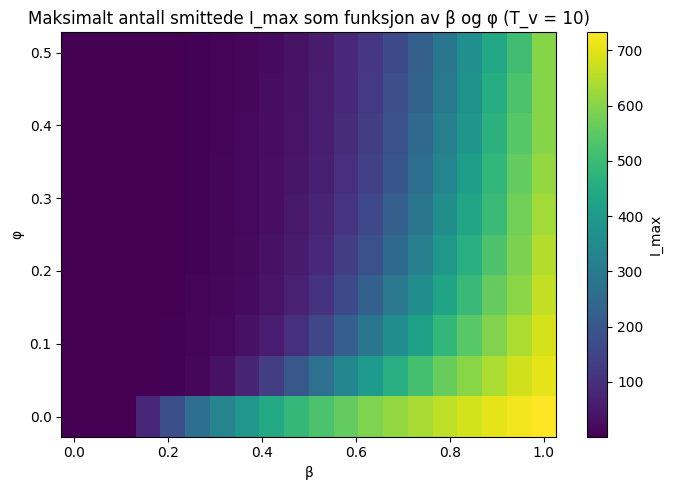

In [7]:
beta_values = np.linspace(0.0, 1.0, 20)      # 20 verdier for β
phi_values = np.linspace(0.0, 0.5, 10)       # 10 verdier for φ
T_v = 10
t_max = 200

Imax = np.zeros((len(phi_values), len(beta_values)))

for i, phi in enumerate(phi_values):
    for j, beta in enumerate(beta_values):
        t, y = sir_model(
            t_max=t_max,
            N=N,
            I_0=I0,
            beta=beta,
            gamma=GAMMA,
            phi=phi,
            T_v=T_v
        )
        I = y[:, 1]
        Imax[i, j] = I.max()

# Lag rutenett for plotting
BETA, PHI = np.meshgrid(beta_values, phi_values)

plt.figure(figsize=(7, 5))
pcm = plt.pcolormesh(BETA, PHI, Imax, shading="auto")
plt.colorbar(pcm, label="I_max")
plt.xlabel("β")
plt.ylabel("φ")
plt.title(f"Maksimalt antall smittede I_max som funksjon av β og φ (T_v = {T_v})")
plt.tight_layout()
plt.show()
